In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sn

In [3]:
df = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IBM_Student Alcohol Consumption\data-modified.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,highu,Fedu,Mjob,Fjob,...,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,6,1,1,1,low,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,4,1,1,1,low,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,10,2,3,3,high,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,5,2,1,1,1,low,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,1,2,2,low,6,10,10


In [4]:
df.shape

(395, 35)

In [6]:
# To convert Categorical variables into numeric form

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason','address','nursery','higher','Fedu','address'])

df.head()

,sex,age,famsize,Pstatus,highu,guardian,traveltime,studytime,failures,schoolsup,...,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,1,18,1,1,4,1,2,2,0,1,...,4,3,6,1,1,1,low,5,6,6
1,1,17,1,1,1,1,1,2,0,1,...,3,3,4,1,1,1,low,5,5,6
2,1,15,1,1,1,1,1,2,3,1,...,2,3,10,2,3,3,high,7,8,10
3,1,15,1,1,4,1,1,3,0,1,...,2,5,2,1,1,1,low,15,14,15
4,1,16,1,1,3,1,1,2,0,1,...,2,5,4,1,2,2,low,6,10,10


In [7]:
X = df.iloc[:,0:19].values
X.shape
X

array([[ 1, 18,  1, ...,  3,  4,  3],
       [ 1, 17,  1, ...,  3,  3,  3],
       [ 1, 15,  1, ...,  3,  2,  3],
       ...,
       [ 1, 21,  1, ...,  5,  3,  3],
       [ 1, 18,  1, ...,  4,  1,  5],
       [ 1, 19,  1, ...,  2,  3,  5]], dtype=int64)

In [8]:
y = df.loc[:,'Alcuse'].values
y.shape
y

array(['low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low'

In [9]:
# Splitting data into training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
# Feature scaling or normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Training the KNN model with K = 5 for first instance

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Predictions of the KNN model with K = 5 for first instance

y_pred = classifier.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

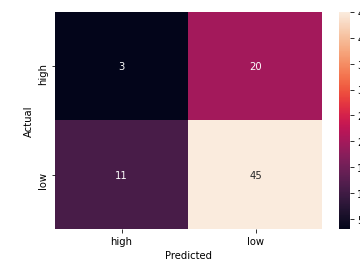

In [13]:
# Evaluating the performance of our KNN classifier model using a confusion matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames =  ['Actual'], colnames = ['Predicted'])
sn.heatmap(confusion_matrix, annot = True)

In [14]:
# Training the classifier to find the best value of K

from sklearn import metrics
scores = {}
scores_list = []
for k in range(1,20):
  classifier1 = KNeighborsClassifier(n_neighbors = k)
  classifier1.fit(X_train, y_train)
  y_pred1 = classifier1.predict(X_test)
  temp = metrics.accuracy_score(y_test, y_pred1)
  scores[k] = temp
  scores_list.append(temp)

Text(0, 0.5, 'Training Accuracy')

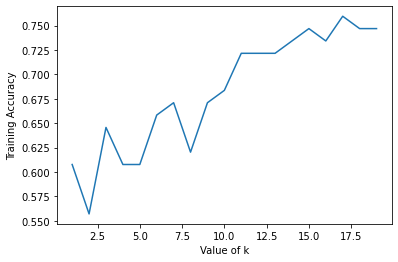

In [15]:
k_range = range(1,20)
plt.plot(k_range, scores_list)
plt.xlabel('Value of k')
plt.ylabel('Training Accuracy')

In [16]:
acc = accuracy_score(y_test, y_pred)
acc

0.6075949367088608

In [17]:
classifier.score(X_test, y_test)

0.6075949367088608

In [18]:
# Using value of K as 17 as optimum K value

classifier1 = KNeighborsClassifier(n_neighbors=17)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [19]:
y_pred1 = classifier1.predict(X_test)

In [20]:
acc = accuracy_score(y_test, y_pred1)
acc

0.759493670886076